In [13]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

# Twitter API Keys
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [186]:
# Target Account
target_user = ('@BBC', '@CBS', '@CNN', '@Fox', '@New York times')

# Variables for holding sentiments
sentiments = []

# Loop through all target users
for target in target_user:

    # Counter
    counter = 1

    # Loop through 100 times
    for x in range(5):

        # Run search around each tweet
        public_tweets = api.user_timeline(target)

        # Loop through all tweets
        for tweet in public_tweets:

            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]

            # Add sentiments for each tweet into an array
            sentiments.append({"Date": tweet["created_at"], 
                                'User': target,
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
            # Add to counter 
            counter = counter + 1
        

In [205]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago,User
0,-0.5423,Sun Dec 24 21:43:10 +0000 2017,0.800,0.200,0.000,1,@BBC
1,-0.3182,Sun Dec 24 20:03:04 +0000 2017,0.909,0.091,0.000,2,@BBC
2,0.3182,Sun Dec 24 19:33:04 +0000 2017,0.881,0.000,0.119,3,@BBC
3,0.7845,Sun Dec 24 19:03:04 +0000 2017,0.622,0.000,0.378,4,@BBC
4,0.8655,Sun Dec 24 18:57:04 +0000 2017,0.508,0.000,0.492,5,@BBC


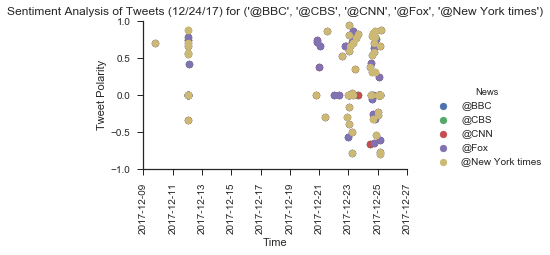

In [257]:
# Create plot
plt.clf()
from matplotlib.artist import setp

#Convert Date to datetime and sort
sentiments_pd['Date'] = pd.to_datetime(sentiments_pd['Date'])
sentiments_pd = sentiments_pd.sort_values(by=['Date'])

sns.set(style='ticks')

np.random.seed(0)
N = len(sentiments_pd['Compound'])
_users= ['@BBC', '@CBS', '@CNN', '@Fox', '@New York times']
df = pd.DataFrame({"Time": sentiments_pd['Date'],
                   "Tweet Polarity": sentiments_pd["Compound"],
                   "News" : np.random.choice(_users,size = N)})

fg = sns.FacetGrid(data=df, hue='News', hue_order=_users, aspect=1.61)
fg.map(plt.scatter, 'Time', 'Tweet Polarity').add_legend()
plt.xticks(rotation=90)
plt.ylim(-1, 1)
plt.xlim('2017-12-09','2017-12-27')
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), target_user))
plt.show()


In [258]:
# Saves an image of our chart so that we can view it in a folder
fg.savefig("Sentiment Analysis of Tweets.png")

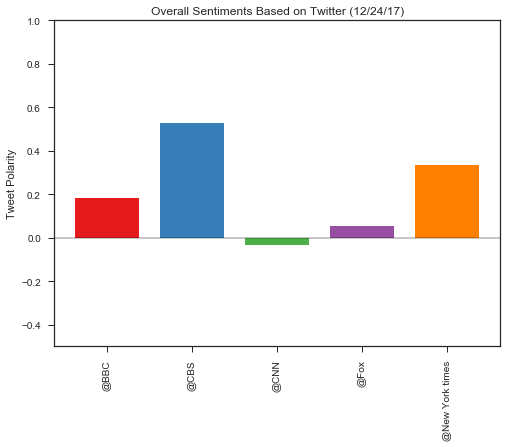

In [260]:
#Create a bar plot visualizing the _overall_ sentiments of the last 100 tweets from each organization
## Groupby User
plt.clf()
avg_compound = sentiments_pd.groupby('User').mean()['Compound']

##Convert list of average compound to DataFrame
avg_compound_df = pd.DataFrame({'': avg_compound})

## Plot
ax=avg_compound_df.plot(kind='bar', legend=False, width=0.75, figsize=(8,6), color=[plt.cm.Set1(np.arange(len(df)))])
plt.ylim(-0.5, 1)
plt.ylabel("Tweet Polarity")
plt.xlabel("")
plt.title("Overall Sentiments Based on Twitter (%s)" % time.strftime("%x"))
plt.hlines(0, -1, 10, alpha=0.25)
plt.show()

In [261]:
# Saves an image of our chart so that we can view it in a folder
fig = ax.get_figure()
fig.savefig("Overall Sentiment.png")

In [256]:
#Export the data in the DataFrame into a CSV file
sentiments_pd.to_csv("News-Tweet-Sentiments.csv")